In [1]:
import pandas as pd
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Covid-19.csv')
gdf = gpd.read_file('Comunas/comunas.shp')

In [4]:
#Quitamos las columna
excluir = ['Isla de Maipo','San José de Maipo','Alhué','San Pedro','Pirque','Paine','Melipilla','Tiltil','Colina','Lampa',
           'Curacaví','María Pinto','Buin','Lo Barnechea','El Monte','Talagante']
gdf_comunas = gdf[(gdf['codregion'] == 13) & (~gdf['Comuna'].isin(excluir)) ][['cod_comuna','geometry']]

In [5]:
df = gdf_comunas.merge(df,right_on='Codigo comuna', left_on='cod_comuna',how='right')

In [6]:
df=df.dropna(subset=['geometry'])

In [7]:
df.columns[290]

'19-12-2022'

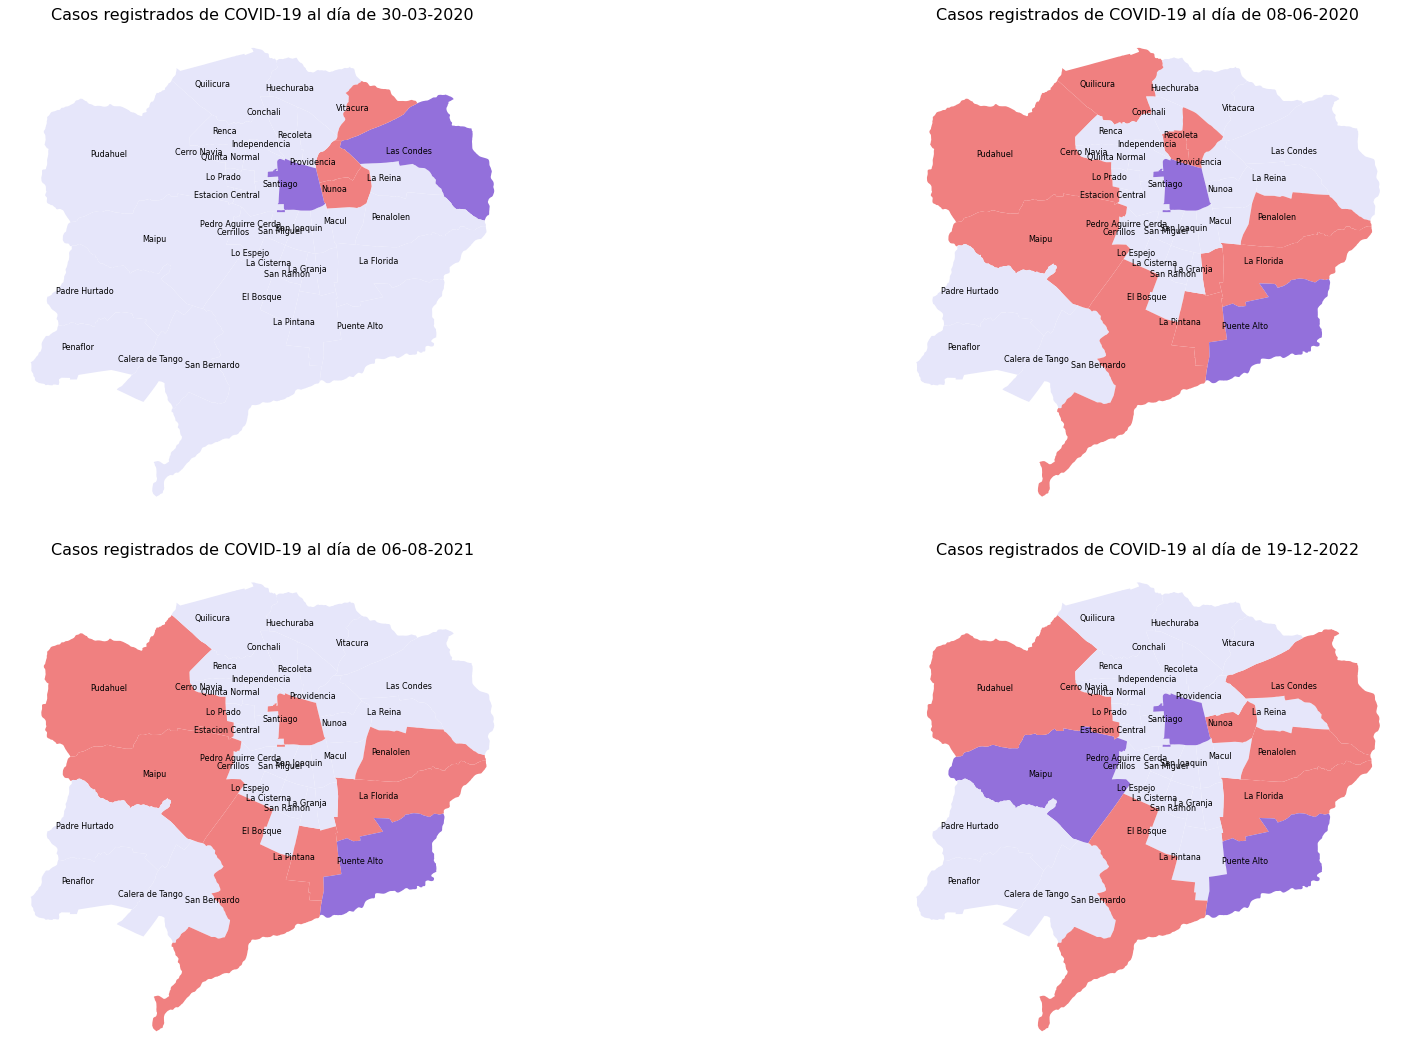

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Crear una figura y ejes para los cuatro mapas
fig, axes = plt.subplots(2, 2, figsize=(30, 15))

# Crear un esquema de color personalizado
custom_cmap = ListedColormap(['lavender', 'lightcoral', 'mediumpurple'])

# Lista de nombres de las columnas
column_names = ['30-03-2020', '08-06-2020', '06-08-2021', '19-12-2022']

# Normalizar los valores de casos
max_cases = df[column_names].max().max()
for col in column_names:
    df[f'normalized_cases_{col}'] = df[col] / max_cases

# Graficar los mapas en los ejes correspondientes
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        col = column_names[i * 2 + j]
        df.plot(ax=ax,
                column=f'normalized_cases_{col}',
                cmap=custom_cmap,
                linewidth=0.2,
                legend=False)

        # Agregar etiquetas a las ubicaciones de las comunas
        for idx, row in df.iterrows():
            centroid = row['geometry'].centroid
            ax.annotate(text=row['Comuna'],
                        xy=(centroid.x, centroid.y),
                        ha='right',
                        size=8,
                        horizontalalignment='right')

        # Agregar título al gráfico
        ax.set_title("Casos registrados de COVID-19 al día de " + col, fontsize=16)

        # Desactivar los ejes para mejorar la presentación
        ax.set_axis_off()

# Ajustar y mostrar la figura
plt.tight_layout()
plt.show()


In [9]:
df_comunas_pivote = df.loc[:, [df.columns[4], df.columns[5], df.columns[1]] + df.columns[7:-5].tolist()]
df_comunas_pivote

,Comuna,Codigo comuna,geometry,30-03-2020,01-04-2020,03-04-2020,06-04-2020,08-04-2020,10-04-2020,13-04-2020,...,05-12-2022,09-12-2022,12-12-2022,16-12-2022,19-12-2022,23-12-2022,26-12-2022,30-12-2022,05-01-2023,09-01-2023
90,Calera de Tango,13403.0,"POLYGON ((-7877355.549 -3971828.617, -7877326....",6.0,7.0,7.0,7.0,8.0,8.0,10.0,...,6730.0,6741.0,6747.0,6766.0,6771.0,6785.0,6797.0,6830.0,6848.0,6854.0
91,Cerrillos,13102.0,"POLYGON ((-7871654.786 -3959463.495, -7871624....",0.0,4.0,4.0,5.0,11.0,21.0,29.0,...,20447.0,20499.0,20525.0,20564.0,20606.0,20687.0,20749.0,20858.0,20956.0,21005.0
92,Cerro Navia,13103.0,"POLYGON ((-7872447.088 -3950281.885, -7872227....",19.0,21.0,26.0,31.0,36.0,42.0,57.0,...,33428.0,33477.0,33492.0,33548.0,33602.0,33683.0,33733.0,33836.0,33935.0,33997.0
94,Conchali,13104.0,"POLYGON ((-7866184.246 -3948416.404, -7866280....",14.0,18.0,22.0,32.0,38.0,47.0,52.0,...,31132.0,31191.0,31213.0,31270.0,31316.0,31377.0,31411.0,31530.0,31653.0,31725.0
96,El Bosque,13105.0,"POLYGON ((-7866196.002 -3973234.783, -7866213....",18.0,28.0,35.0,37.0,46.0,64.0,83.0,...,42806.0,42882.0,42935.0,43023.0,43099.0,43177.0,43265.0,43423.0,43577.0,43638.0
98,Estacion Central,13106.0,"POLYGON ((-7868000.781 -3954655.942, -7867960....",16.0,22.0,25.0,36.0,41.0,61.0,71.0,...,40345.0,40398.0,40430.0,40493.0,40553.0,40643.0,40715.0,40911.0,41014.0,41082.0
99,Huechuraba,13107.0,"POLYGON ((-7869094.986 -3944017.368, -7869086....",17.0,19.0,22.0,32.0,35.0,38.0,48.0,...,27452.0,27517.0,27559.0,27634.0,27683.0,27758.0,27820.0,27962.0,28101.0,28165.0
100,Independencia,13108.0,"POLYGON ((-7865631.125 -3948404.075, -7865643....",15.0,17.0,22.0,26.0,31.0,37.0,52.0,...,29390.0,29431.0,29459.0,29508.0,29552.0,29617.0,29676.0,29816.0,29910.0,29960.0
102,La Cisterna,13109.0,"POLYGON ((-7865040.615 -3968217.521, -7865077....",10.0,12.0,12.0,20.0,26.0,34.0,39.0,...,24195.0,24252.0,24286.0,24334.0,24379.0,24457.0,24513.0,24651.0,24771.0,24837.0
103,La Florida,13110.0,"POLYGON ((-7841285.109 -3960800.595, -7841150....",43.0,58.0,67.0,91.0,103.0,126.0,165.0,...,105931.0,106116.0,106229.0,106478.0,106640.0,106923.0,107158.0,107621.0,108014.0,108264.0


In [10]:
df_comunas_melt = pd.melt(df_comunas_pivote, id_vars=['Comuna', 'Codigo comuna','geometry'], var_name='Fecha', value_name='casos covid')
df_comunas_melt.Fecha=pd.to_datetime(df_comunas_melt.Fecha, format="%d-%m-%Y")
df_comunas_melt

,Comuna,Codigo comuna,geometry,Fecha,casos covid
0,Calera de Tango,13403.0,"POLYGON ((-7877355.549 -3971828.617, -7877326....",2020-03-30,6.0
1,Cerrillos,13102.0,"POLYGON ((-7871654.786 -3959463.495, -7871624....",2020-03-30,0.0
2,Cerro Navia,13103.0,"POLYGON ((-7872447.088 -3950281.885, -7872227....",2020-03-30,19.0
3,Conchali,13104.0,"POLYGON ((-7866184.246 -3948416.404, -7866280....",2020-03-30,14.0
4,El Bosque,13105.0,"POLYGON ((-7866196.002 -3973234.783, -7866213....",2020-03-30,18.0
...,...,...,...,...,...
10399,San Joaquin,13129.0,"POLYGON ((-7861762.687 -3958307.095, -7861708....",2023-01-09,27956.0
10400,San Miguel,13130.0,"POLYGON ((-7863229.775 -3964360.652, -7863319....",2023-01-09,43888.0
10401,San Ramon,13131.0,"POLYGON ((-7863398.118 -3964354.273, -7863319....",2023-01-09,20350.0
10402,Santiago,13101.0,"POLYGON ((-7864917.074 -3952801.626, -7864220....",2023-01-09,141401.0


In [11]:
df_comunas_filtrado = df_comunas_melt[(df_comunas_melt.Fecha >= '2020-01-01') & (df_comunas_melt.Fecha < '2020-06-01')]

In [12]:
df_comunas_filtrado 

,Comuna,Codigo comuna,geometry,Fecha,casos covid
0,Calera de Tango,13403.0,"POLYGON ((-7877355.549 -3971828.617, -7877326....",2020-03-30,6.0
1,Cerrillos,13102.0,"POLYGON ((-7871654.786 -3959463.495, -7871624....",2020-03-30,0.0
2,Cerro Navia,13103.0,"POLYGON ((-7872447.088 -3950281.885, -7872227....",2020-03-30,19.0
3,Conchali,13104.0,"POLYGON ((-7866184.246 -3948416.404, -7866280....",2020-03-30,14.0
4,El Bosque,13105.0,"POLYGON ((-7866196.002 -3973234.783, -7866213....",2020-03-30,18.0
...,...,...,...,...,...
751,San Joaquin,13129.0,"POLYGON ((-7861762.687 -3958307.095, -7861708....",2020-05-29,1603.0
752,San Miguel,13130.0,"POLYGON ((-7863229.775 -3964360.652, -7863319....",2020-05-29,1444.0
753,San Ramon,13131.0,"POLYGON ((-7863398.118 -3964354.273, -7863319....",2020-05-29,1543.0
754,Santiago,13101.0,"POLYGON ((-7864917.074 -3952801.626, -7864220....",2020-05-29,5617.0


In [13]:
cant_viejes = pd.read_csv('../Input/BIP/BIPComuna_std.csv')
poblacion = pd.read_csv('../Input/Poblacion_comuna.csv', sep=';')

In [14]:
cant_viajes = cant_viejes.groupby(['Fecha','Codigo comuna'])['Transacciones'].sum().reset_index()
poblacion = poblacion.groupby(['Codigo comuna'])['TOTAL'].sum().reset_index()

In [15]:
cant_viajes['Fecha'] = pd.to_datetime(cant_viajes['Fecha'])
df_scatter = df_comunas_filtrado.merge(cant_viajes, on=['Codigo comuna','Fecha'], how='left' )
df_scatter = df_scatter.merge(poblacion,on='Codigo comuna',how='left')

In [16]:
df_scatter['Poblacion']=df_scatter['TOTAL']

In [20]:
import plotly.express as px

# Convertir las fechas a formato de cadena
df_scatter['Fecha_str'] = df_scatter['Fecha'].dt.strftime('%Y-%m-%d')

fig = px.scatter(df_scatter, x="Transacciones", y="Poblacion",
                 size="casos covid", color="Comuna", animation_frame="Fecha_str",
                 hover_name="Comuna", log_x=True, size_max=300,
                 range_x=[3000,200000], range_y=[-1000,1000000])
fig.show()
